In [ ]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

In [2]:
from yolo.frontend import create_yolo

In [6]:
# 1. create yolo instance
yolo_detector = create_yolo("VGG16", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 416, 416, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 416, 416, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 416, 416, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 208, 208, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 208, 208, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 208, 208, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 104, 104, 128)     0         
__________

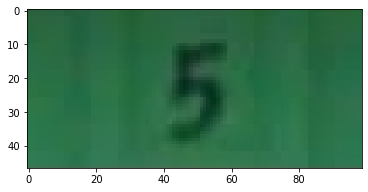

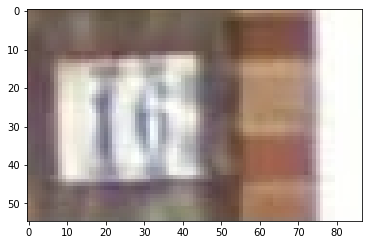

In [25]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "dataset", "svhn", "imgs", "test")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "10.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

In [13]:
len(imgs)

2

In [ ]:
from yolo.backend.utils.annotation import parse_annotation

annotations = parse_annotation('dataset/svhn/anns/test',
                               'dataset/svhn/imgs/test',
                               ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"],
                               is_only_detect=False)

실제값===>  [5]
예측값===>  []
0-boxes are detected.


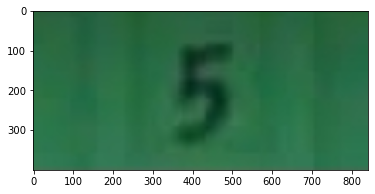

실제값===>  [5]
예측값===>  []
0-boxes are detected.


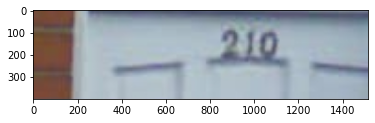

In [14]:
# 4. Predict digit region

THRESHOLD = 0.3
for img in imgs:
    i = 0
    boxes, probs = yolo_detector.predict(img, THRESHOLD)
    
    labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 
    
    true_boxes = annotations.boxes(i)
    true_labels = annotations.code_labels(i)
    
    print('실제값===> ', true_labels)
    print('예측값===> ', labels)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()
    i += 1

In [34]:
import numpy as np

In [60]:
imgs[0].shape

(47, 99, 3)

In [61]:
imgs[1].shape

(55, 87, 3)

0
테스트 파일===> dataset/svhn/imgs/test\1.png
실제값===>  [5]
예측값===>  [9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9
 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8
 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9
 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0
 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6
 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9
 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8
 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9
 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0
 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6
 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9
 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8
 6 9 9 0 8 6 9 9 0 8 6 9 9 0 8 6 9 9

C:\Users\Daumsoft\Downloads\Yolo-digit-detector-master\yolo\backend\utils\box.py:101: RuntimeWarning: overflow encountered in long_scalars
  (x1, y1 - 13),


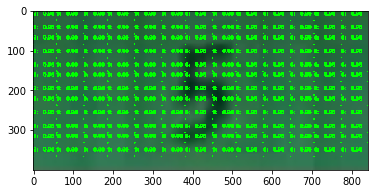

2


KeyboardInterrupt: 

In [37]:
THRESHOLD = 0.3
i = 0
for img in imgs:    
    print(i)
    boxes, probs = yolo_detector.predict(img, THRESHOLD)
#     print(boxes)
#     print(probs)
    
    labels = np.argmax(probs, axis=1) if len(probs) > 0 else [] 
    
    true_boxes = annotations.boxes(i)
    true_labels = annotations.code_labels(i)
    
    print('테스트 파일===>', annotations.fname(i))    
    print('실제값===> ', true_labels)
    print('예측값===> ', labels)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    i += 1
    plt.imshow(image)
    plt.show()

In [ ]:
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

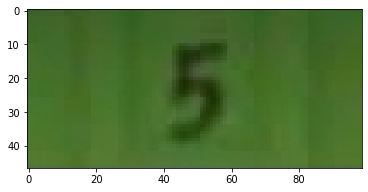

In [47]:
img = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# HERE!!!!!!!!!!!

In [14]:
yolo.PROJECT_ROOT

'C:\\Users\\Daumsoft\\Downloads\\Yolo-digit-detector-master'

In [15]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)
DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "saved_folder_res", "retrain", "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_5[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_197 (Activation)     (None, 208, 208, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

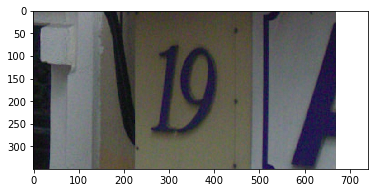

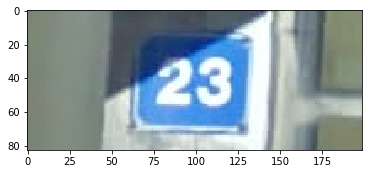

In [16]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

0-boxes are detected.


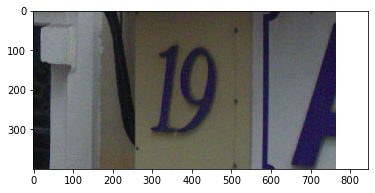

0-boxes are detected.


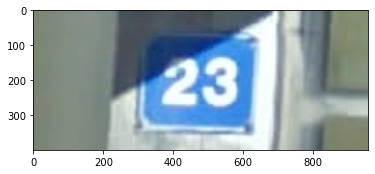

In [17]:
# 4. Predict digit region
from yolo.backend.utils.box import draw_scaled_boxes

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()